In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from collections import Counter

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.util import ngrams

In [6]:
from textblob import TextBlob

In [7]:
import re

In [8]:
from transformers import pipeline

2025-03-17 11:31:28.011524: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# !pip install contractions

In [15]:
import contractions

In [16]:
# nltk.download("punkt")
# nltk.download("stopwords")

<h3> Data Set Up </h3>

In [41]:
df = pd.read_csv("Data/labelled_success.csv")
df.drop(columns=df.columns[0], inplace= True)

In [43]:
df.head()

,SongID,Performer,Song,Week Position,Weeks on Chart,spotify_genre,spotify_track_id,Lyrics,Hit,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Hit_2
0,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,6,20,"['album rock', 'bubblegum pop', 'country rock'...",5nBp8F6tekSrnFg8G2Pvug,I was a car hop\rYou were into be-bop\rYou san...,False,0.647,...,0.0,0.0274,0.4320,0.000006,0.1330,0.952,155.697,4.0,40.0,False
1,'Til My Baby Comes HomeLuther Vandross,Luther Vandross,'Til My Baby Comes Home,29,16,"['funk', 'motown', 'neo soul', 'new jack swing...",2R97RZWUx4vAFbMMtmb5Ss,Theres a whole lot of girls\r\nmessin around\r...,False,0.804,...,0.0,0.1830,0.0567,0.000006,0.0253,0.802,139.663,4.0,29.0,False
2,'Til Summer Comes AroundKeith Urban,Keith Urban,'Til Summer Comes Around,58,16,"['australian country', 'contemporary country',...",1CKmI1IQjVEVB3F7VmJmM3,Another long summer's come and gone\r\nI don't...,False,0.570,...,0.0,0.0331,0.5930,0.000136,0.7700,0.308,127.907,4.0,42.0,False
3,'Til You Do Me RightAfter 7,After 7,'Til You Do Me Right,31,22,"['funk', 'neo soul', 'new jack swing', 'quiet ...",3kGMziz884MLV1oCwrarmN,I was in love with you\r\nAnd gave my heart to...,False,0.612,...,1.0,0.0264,0.0781,0.000000,0.0763,0.433,76.744,4.0,42.0,False
4,'TilThe Angels,The Angels,'Til,14,15,"['blues rock', 'garage rock', 'modern blues ro...",6cMBpazQUSw6xYiLNYvQzf,"Due to copyright restrictions, we are not auth...",False,0.253,...,1.0,0.0318,0.8050,0.000180,0.0939,0.307,173.819,3.0,10.0,False


In [45]:
df["Hit"].value_counts()

Hit
False    12548
True      1267
Name: count, dtype: int64

In [47]:
df["Hit_2"].value_counts()

Hit_2
False    8900
True     4915
Name: count, dtype: int64

In [49]:
# I am working with Success Definition 1

In [51]:
relevant_columns = ["SongID","Song","Performer","Lyrics","Hit"]
df1 = df[relevant_columns]

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SongID     13815 non-null  object
 1   Song       13815 non-null  object
 2   Performer  13815 non-null  object
 3   Lyrics     13815 non-null  object
 4   Hit        13815 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 445.3+ KB


In [55]:
df1.to_csv("Hit_1.csv")

In [57]:
relevant_columns = ["SongID","Song","Performer","Lyrics","Hit_2"]
df2 = df[relevant_columns]
df2.rename(columns = {"Hit_2" : "Hit"}, inplace = True)

/var/folders/31/89q4lfy92jx4lp6kwytq6lmw0000gn/T/ipykernel_4264/2482373051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {"Hit_2" : "Hit"}, inplace = True)


In [63]:
df2.to_csv("Hit_2.csv")

<h3> Analyzing - Definition 2 </h3>

In [30]:
# df = df1
df = pd.read_csv("Hit_2.csv")
df.drop(columns = df.columns[0], inplace = True)

In [34]:
df = df.rename(columns = {"Song_x" : "Song", "Performer_x" : "Performer", "Lyrics_x" : "Lyrics", "Hit_x" : "Hit"})

In [36]:
df.head()

,SongID,Song,Performer,Lyrics,Hit,Cleaned_Lyrics
0,'65 Love AffairPaul Davis,'65 Love Affair,Paul Davis,I was a car hop\rYou were into be-bop\rYou san...,False,car hop bebop sang wop diddy wop diddy wop doo...
1,'Til My Baby Comes HomeLuther Vandross,'Til My Baby Comes Home,Luther Vandross,Theres a whole lot of girls\r\nmessin around\r...,False,whole lot girls messin around trying get thing...
2,'Til Summer Comes AroundKeith Urban,'Til Summer Comes Around,Keith Urban,Another long summer's come and gone\r\nI don't...,False,another long summer 's come gone know always e...
3,'Til You Do Me RightAfter 7,'Til You Do Me Right,After 7,I was in love with you\r\nAnd gave my heart to...,False,love gave heart best keep satisfied took love ...
4,'TilThe Angels,'Til,The Angels,"Due to copyright restrictions, we are not auth...",False,due copyright restrictions authorized display ...


In [38]:
df.to_csv("Hit_2.csv")

In [40]:
df["Hit"] = df["Hit"].astype('int')

In [42]:
df["Hit"].value_counts()

Hit
0    8900
1    4915
Name: count, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SongID          13815 non-null  object
 1   Song            13815 non-null  object
 2   Performer       13815 non-null  object
 3   Lyrics          13815 non-null  object
 4   Hit             13815 non-null  int64 
 5   Cleaned_Lyrics  13790 non-null  object
dtypes: int64(1), object(5)
memory usage: 647.7+ KB


In [46]:
df.isna().sum()

SongID             0
Song               0
Performer          0
Lyrics             0
Hit                0
Cleaned_Lyrics    25
dtype: int64

<h4> Clean Up </h4>

In [49]:
def clean_lyrics(text):
    if pd.isna(text):  # Handle missing values
        return ""
    
    text = text.lower() 
    text = re.sub(r"\[.*?\]", "", text)  # Remove section markers like [Chorus], [Verse]
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s']", "", text)  # Keep words and apostrophes, remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces

    return text

In [51]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    
    return expanded_text 

In [75]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return " ".join(filtered_tokens)

In [77]:
df["Cleaned_Lyrics"] = df["Lyrics"].apply(clean_lyrics)
df["Cleaned_Lyrics"] = df["Cleaned_Lyrics"].apply(lambda x : expand_contractions(x))
df["Cleaned_Lyrics"] = df["Cleaned_Lyrics"].apply(remove_stopwords)

In [78]:
df["Tokenized_Lyrics"] = df["Cleaned_Lyrics"].apply(word_tokenize)

# Compute Word Count
df["Word_Count"] = df["Tokenized_Lyrics"].apply(len)

# Compute Unique Word Count
df["Unique_Word_Count"] = df["Tokenized_Lyrics"].apply(lambda x: len(set(x)))


df["Lexical_Density"] = df["Unique_Word_Count"] / df["Word_Count"]

In [55]:
df.head()

,SongID,Song,Performer,Lyrics,Hit,Cleaned_Lyrics,Tokenized_Lyrics,Word_Count,Unique_Word_Count,Lexical_Density
0,'65 Love AffairPaul Davis,'65 Love Affair,Paul Davis,I was a car hop\rYou were into be-bop\rYou san...,0,i was a car hop you were into bebop you sang d...,"[i, was, a, car, hop, you, were, into, bebop, ...",273,90,0.329670
1,'Til My Baby Comes HomeLuther Vandross,'Til My Baby Comes Home,Luther Vandross,Theres a whole lot of girls\r\nmessin around\r...,0,there is a whole lot of girls messin around tr...,"[there, is, a, whole, lot, of, girls, messin, ...",292,132,0.452055
2,'Til Summer Comes AroundKeith Urban,'Til Summer Comes Around,Keith Urban,Another long summer's come and gone\r\nI don't...,0,another long summer's come and gone i do not k...,"[another, long, summer, 's, come, and, gone, i...",300,135,0.450000
3,'Til You Do Me RightAfter 7,'Til You Do Me Right,After 7,I was in love with you\r\nAnd gave my heart to...,0,i was in love with you and gave my heart to yo...,"[i, was, in, love, with, you, and, gave, my, h...",286,115,0.402098
4,'TilThe Angels,'Til,The Angels,"Due to copyright restrictions, we are not auth...",0,due to copyright restrictions we are not autho...,"[due, to, copyright, restrictions, we, are, no...",12,11,0.916667


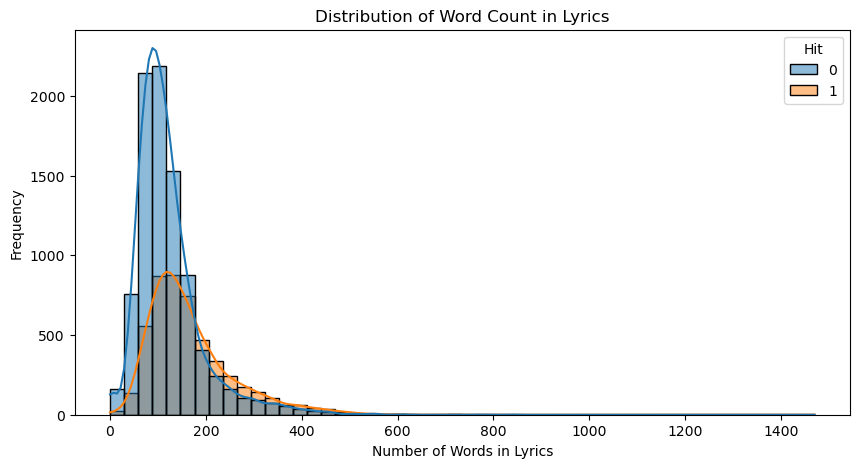

In [81]:
# 1️⃣ Word Count Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Word_Count", hue="Hit", bins=50, kde=True)
plt.title("Distribution of Word Count in Lyrics")
plt.xlabel("Number of Words in Lyrics")
plt.ylabel("Frequency")
plt.show()

In [83]:
#2️⃣ Most Common Words in Hit Songs
hit_songs = df[df["Hit"] == 1]["Cleaned_Lyrics"].str.cat(sep=" ")
non_hit_songs = df[df["Hit"] == 0]["Cleaned_Lyrics"].str.cat(sep=" ")


In [85]:
# Tokenize and remove stopwords
stop_words = set(stopwords.words("english"))
hit_tokens = [word for word in word_tokenize(hit_songs) if word not in stop_words]
non_hit_tokens = [word for word in word_tokenize(non_hit_songs) if word not in stop_words]

In [86]:
hit_word_freq = Counter(hit_tokens).most_common(20)
non_hit_word_freq = Counter(non_hit_tokens).most_common(20)

In [87]:
# Convert to DataFrame
hit_df = pd.DataFrame(hit_word_freq, columns=["Word", "Frequency"])
non_hit_df = pd.DataFrame(non_hit_word_freq, columns=["Word", "Frequency"])

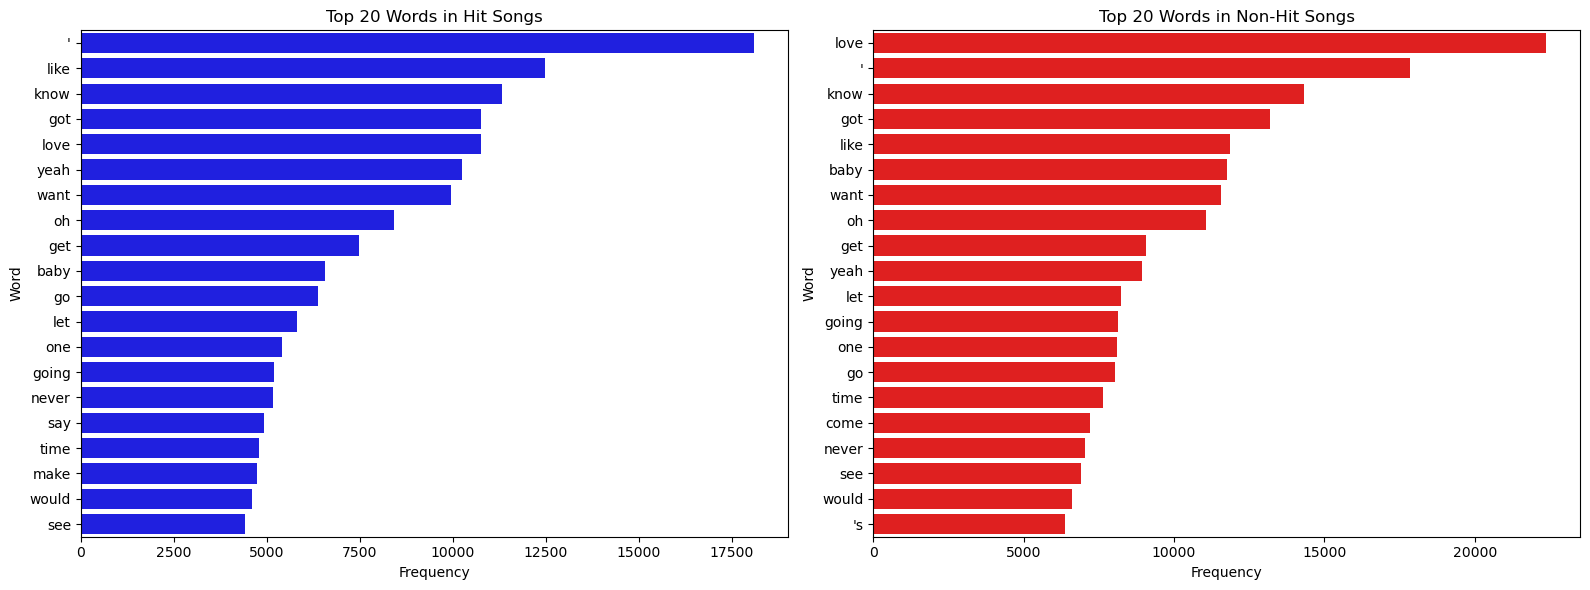

In [88]:
# Plot Most Common Words
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x="Frequency", y="Word", data=hit_df, ax=axes[0], color="blue")
axes[0].set_title("Top 20 Words in Hit Songs")

sns.barplot(x="Frequency", y="Word", data=non_hit_df, ax=axes[1], color="red")
axes[1].set_title("Top 20 Words in Non-Hit Songs")

plt.tight_layout()
plt.show()


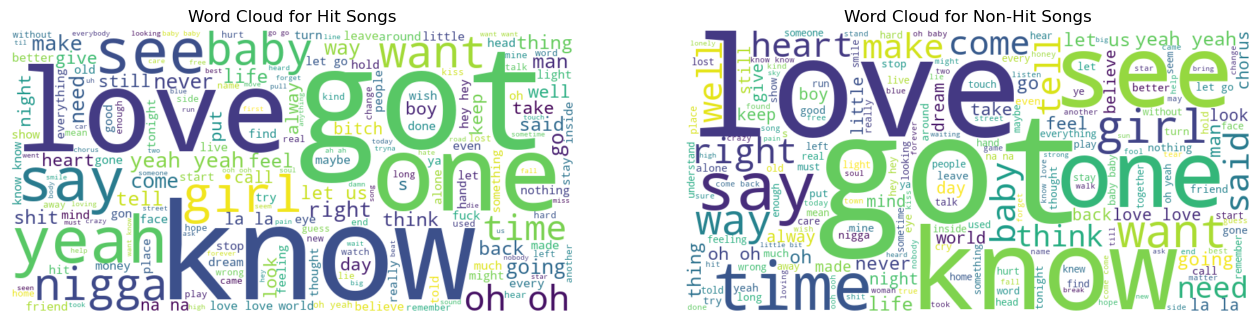

In [93]:
# 3️⃣ Word Cloud for Hit vs. Non-Hit Songs
hit_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(hit_songs)
non_hit_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(non_hit_songs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(hit_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Hit Songs")

plt.subplot(1, 2, 2)
plt.imshow(non_hit_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Non-Hit Songs")

plt.show()


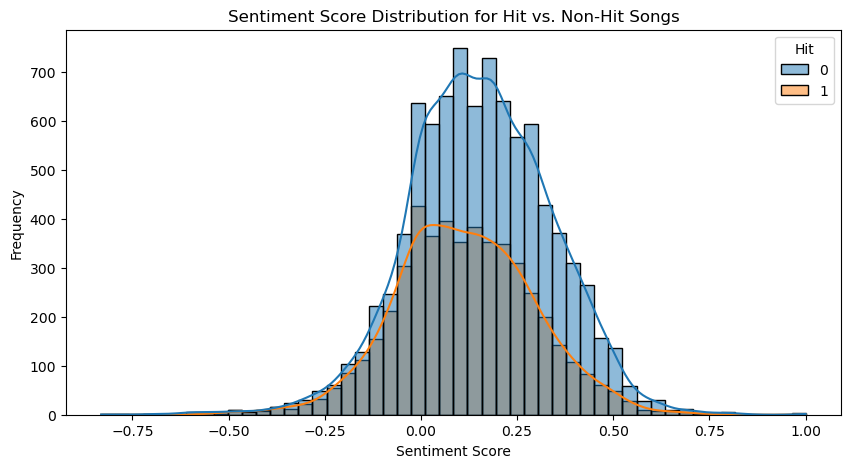

In [95]:
# 4️⃣ Sentiment Analysis
df["Sentiment_Score"] = df["Cleaned_Lyrics"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Sentiment_Score", hue="Hit", bins=50, kde=True)
plt.title("Sentiment Score Distribution for Hit vs. Non-Hit Songs")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [97]:
df = df[["SongID","Song","Performer","Lyrics","Cleaned_Lyrics","Hit"]]

<h4> Analyzing Bi - Grams </h4>

In [100]:
def get_ngrams(text, n=2):
    tokens = nltk.word_tokenize(text)
    # Filter out tokens that are stopwords or too short if necessary
    return list(ngrams(tokens, n))

In [102]:
hit_text = " ".join(df[df["Hit"] == 1]["Cleaned_Lyrics"].tolist())
non_hit_text = " ".join(df[df["Hit"] == 0]["Cleaned_Lyrics"].tolist())


In [104]:
hit_bigrams = get_ngrams(hit_text, n=2)
non_hit_bigrams = get_ngrams(non_hit_text, n=2)

hit_bigram_freq = Counter(hit_bigrams).most_common(20)
non_hit_bigram_freq = Counter(non_hit_bigrams).most_common(20)

In [105]:
hit_bigrams_df = pd.DataFrame(hit_bigram_freq, columns=["Bigram", "Frequency"])
hit_bigrams_df['Bigram'] = hit_bigrams_df['Bigram'].apply(lambda x: ' '.join(x))

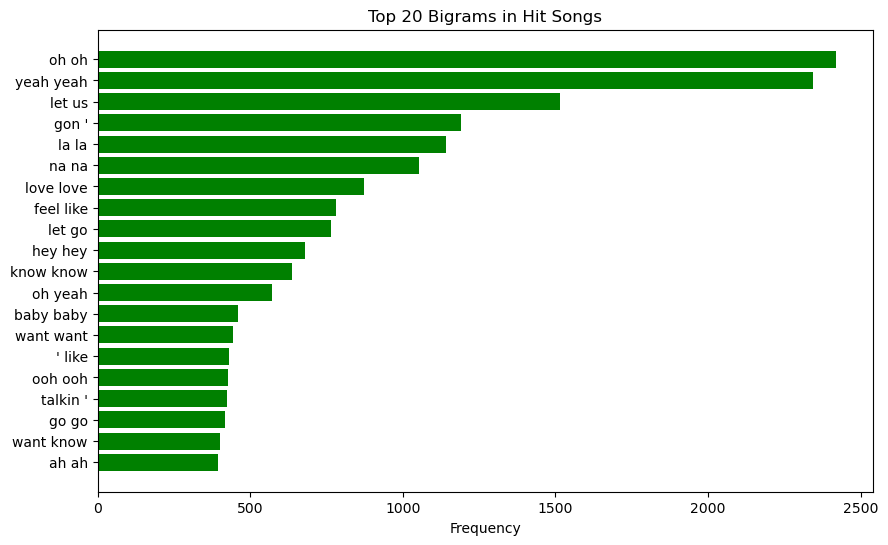

In [106]:
plt.figure(figsize=(10, 6))
plt.barh(hit_bigrams_df['Bigram'], hit_bigrams_df['Frequency'], color='green')
plt.title("Top 20 Bigrams in Hit Songs")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()

<h4> Topic Modelling </h4>

In [107]:
# !pip install pyLDAvis

In [112]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [114]:
df['Tokens'] = df['Cleaned_Lyrics'].apply(nltk.word_tokenize)

In [115]:
dictionary = corpora.Dictionary(df['Tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['Tokens']]


In [116]:
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

In [117]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.053*"la" + 0.033*"hey" + 0.025*"oh" + 0.020*"dance" + 0.019*"ah" + 0.016*"baby" + 0.014*"shake" + 0.010*"que" + 0.008*"come" + 0.008*"de"')
(1, '0.164*"\'" + 0.063*"yeah" + 0.025*"got" + 0.011*"na" + 0.009*"get" + 0.009*"want" + 0.008*"like" + 0.007*"oh" + 0.006*"know" + 0.006*"ooh"')
(2, '0.027*"like" + 0.021*"get" + 0.019*"got" + 0.011*"know" + 0.010*"nigga" + 0.009*"ya" + 0.009*"shit" + 0.009*"bitch" + 0.008*"want" + 0.008*"go"')
(3, '0.033*"love" + 0.021*"know" + 0.016*"want" + 0.016*"oh" + 0.015*"baby" + 0.012*"like" + 0.011*"never" + 0.011*"time" + 0.011*"one" + 0.010*"got"')
(4, '0.013*"\'s" + 0.011*"little" + 0.008*"like" + 0.008*"got" + 0.008*"man" + 0.007*"going" + 0.007*"night" + 0.007*"back" + 0.006*"said" + 0.006*"old"')


<h4> Readability & Phoenatic Analytics </h4>

In [122]:
import textstat

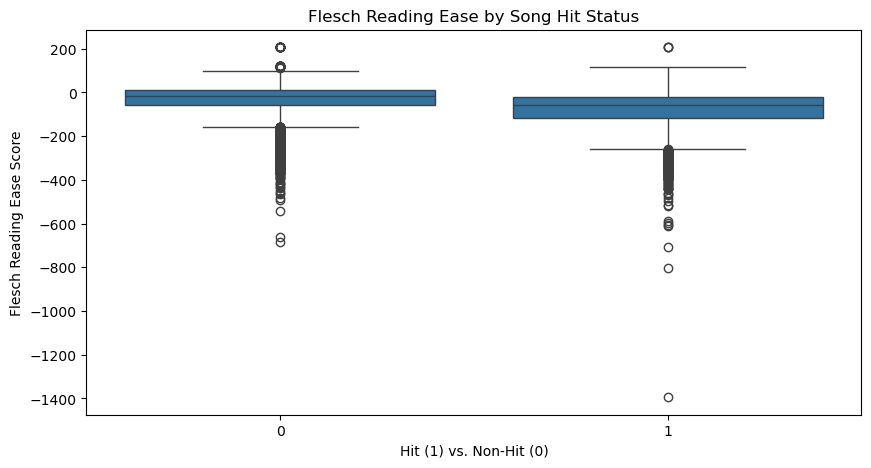

In [123]:
df['Flesch_Reading_Ease'] = df['Cleaned_Lyrics'].apply(textstat.flesch_reading_ease)

# Compare readability scores for hit vs. non-hit songs
plt.figure(figsize=(10, 5))
sns.boxplot(x="Hit", y="Flesch_Reading_Ease", data=df)
plt.title("Flesch Reading Ease by Song Hit Status")
plt.xlabel("Hit (1) vs. Non-Hit (0)")
plt.ylabel("Flesch Reading Ease Score")
plt.show()